<a href="https://colab.research.google.com/github/adityasaicareer/Project_NUS/blob/main/main_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/hard-hat-detection")

print("Path to dataset files:", path)

100%|██████████| 1.22G/1.22G [00:05<00:00, 248MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/hard-hat-detection/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/andrewmvd/hard-hat-detection/versions/1'

In [ ]:
import glob

In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

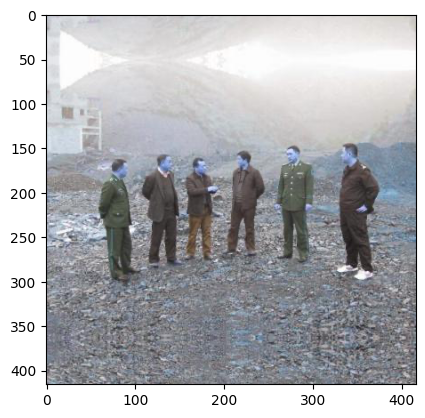

In [ ]:
imagespath=glob.glob(path+'/images/*')
image=cv2.imread(imagespath[0])
plt.imshow(image)

In [ ]:
boxpaths=glob.glob(path+'/annotations/*')

In [ ]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.1 MB/s eta 0:00:00


In [ ]:
from lxml import etree
temp=etree.parse(glob.glob(path+'/annotations/*')[0])

In [ ]:
newxml=etree.tostring(temp,pretty_print=True,encoding=str)

In [ ]:
print(newxml)

<annotation>
    <folder>images</folder>
    <filename>hard_hat_workers2577.png</filename>
    <size>
        <width>416</width>
        <height>416</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>124</xmin>
            <ymin>127</ymin>
            <xmax>159</xmax>
            <ymax>169</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>164</xmin>
            <ymin>142</ymin>
            <xmax>199</xmax>
            <ymax>187</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncate

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
import cv2
import glob

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
def get_bounding_boxes(xml_file):
  parse=ET.parse(xml_file)
  root=parse.getroot()
  box=[]

  for obj in root.findall('object'):
    bndbox=obj.find('bndbox')
    xmin=int(bndbox.find('xmin').text)/416
    ymin=int(bndbox.find('ymin').text)
    xmax=int(bndbox.find('xmax').text)
    ymax=int(bndbox.find('ymax').text)

    box.append((xmin,ymin,xmax,ymax))
  return box

In [ ]:
boxpaths.sort()

In [ ]:
imagespath.sort()

In [ ]:
target2label={0:'Background',1:'Helmet'}

In [ ]:
label2target={b:a for a,b in target2label.items()}

In [ ]:
num_classes=len(label2target)

In [ ]:
preprocess=transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
class opendataset:
  def __init__(self,img,box):
    self.imgpath=img
    self.boxpath=box
  def __len__(self):
    return len(self.imgpath)

  def __getitem__(self,ix):
    imagepath=self.imgpath[ix]
    image=cv2.imread(imagepath)
    image=preprocess(image)
    print(image.shape)
    boxpath=self.boxpath[ix]
    boxes=get_bounding_boxes(boxpath)
    box=[]
    for i in boxes:
      xmin,ymin,xmax,ymax=i
      box.append([xmin,ymin,xmax,ymax])
    target={}
    target['boxes']=torch.Tensor(boxes).float()
    target['labels']=torch.Tensor([1]).long()

    return image.to(device),target

  def collate_fn(self, batch):
        return tuple(zip(*batch))




In [ ]:
dataset=opendataset(imagespath,boxpaths)

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
dataset[2]

torch.Size([3, 416, 416])


(tensor([[[0.8353, 0.8353, 0.8353,  ..., 0.8471, 0.8471, 0.8471],
          [0.8353, 0.8353, 0.8353,  ..., 0.8471, 0.8471, 0.8471],
          [0.8353, 0.8353, 0.8353,  ..., 0.8471, 0.8471, 0.8471],
          ...,
          [0.8392, 0.8392, 0.8353,  ..., 0.8667, 0.8667, 0.8784],
          [0.8392, 0.8353, 0.8314,  ..., 0.9451, 0.9098, 0.8941],
          [0.8392, 0.8353, 0.8314,  ..., 0.8431, 0.8392, 0.8824]],
 
         [[0.7882, 0.7882, 0.7882,  ..., 0.8118, 0.8118, 0.8118],
          [0.7882, 0.7882, 0.7882,  ..., 0.8118, 0.8118, 0.8118],
          [0.7882, 0.7882, 0.7882,  ..., 0.8118, 0.8118, 0.8118],
          ...,
          [0.8078, 0.8078, 0.8039,  ..., 0.8392, 0.8392, 0.8510],
          [0.8078, 0.8039, 0.8000,  ..., 0.9176, 0.8863, 0.8706],
          [0.8078, 0.8039, 0.8000,  ..., 0.8157, 0.8157, 0.8588]],
 
         [[0.7412, 0.7412, 0.7412,  ..., 0.7569, 0.7569, 0.7569],
          [0.7412, 0.7412, 0.7412,  ..., 0.7569, 0.7569, 0.7569],
          [0.7412, 0.7412, 0.7412,  ...,

In [ ]:
n_epochs=5
train_loader=DataLoader(dataset,batch_size=8,shuffle=True,drop_last=True,collate_fn=dataset.collate_fn)


In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
def get_model():
  model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
  in_features=model.roi_heads.box_predictor.cls_score.in_features
  model.roi_heads.box_predictor=FastRCNNPredictor(in_features,2)
  return model

In [ ]:
model=get_model()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 218MB/s]


In [ ]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
def train_batch(inputs,model,optimizer):
  model.train()
  input,targets=inputs
  print(targets)
  input=list(i.to(device) for i in input)
  targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
  optimizer.zero_grad()
  losses=model(input,targets)
  losses.backward()
  optimizer.step()
  loss=sum(i for i in losses.values())
  loss.backward()

  optimizer.step()

  return loss


In [ ]:
model=model.to('cuda')

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
from tqdm import tqdm

In [ ]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
for i in tqdm(range(5)):
  for bx,inputs in enumerate(train_loader):
    l=train_batch(inputs,model,optimizer)
    print(l)